In [1]:
import json
import requests
import random as random
from pprint import pprint
from config import fapi_key
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
colorado1 = pd.read_csv('co_pop_data.csv')

# API Call

In [2]:
co_crime_stats = 'https://api.usa.gov/crime/fbi/sapi/api/data/arrest/states/offense/' + 'CO' + '/all/2006/2019?API_KEY=' + fapi_key

response = requests.get(co_crime_stats)
response_json = response.json()
pretty = json.dumps(response_json)
print('----STATE: CO----')
pprint(pretty, depth=1)

----STATE: CO----
('{"results": [{"aggravated_assault": 5471, "all_other_offenses": 98059, '
 '"arson": 285, "burglary": 3142, "curfew": 2651, "disorderly": 12254, '
 '"driving": 31380, "drug_abuse_gt": 19843, "drug_poss_m": 10419, '
 '"drug_poss_opium": 3241, "drug_poss_other": 3502, "drug_poss_subtotal": '
 '17515, "drug_poss_synthetic": 353, "drug_sales_m": 712, "drug_sales_opium": '
 '771, "drug_sales_other": 604, "drug_sales_subtotal": 2209, '
 '"drug_sales_synthetic": 122, "drunkness": 384, "embezzlement": 192, '
 '"forgery": 1724, "fraud": 2594, "g_all": 0, "g_b": 0, "g_n": 0, "g_t": 5, '
 '"ht_c_s_a": 0, "ht_i_s": 0, "larceny": 19408, "liquor": 17332, '
 '"manslaughter": 5, "mvt": 1923, "murder": 112, "offense_family": 3014, '
 '"prostitution": 499, "prostitution_a_p_p": 0, "prostitution_p": 0, '
 '"prostitution_p_p": 0, "rape": 489, "robbery": 1062, "sex_offense": 1057, '
 '"simple_assault": 16102, "stolen_property": 1232, "suspicion": 23, '
 '"vagrancy": 194, "vandalism": 652

In [3]:
response_json.keys()

dict_keys(['results', 'pagination'])

In [4]:
response_json['results'][0]

{'aggravated_assault': 5471,
 'all_other_offenses': 98059,
 'arson': 285,
 'burglary': 3142,
 'curfew': 2651,
 'disorderly': 12254,
 'driving': 31380,
 'drug_abuse_gt': 19843,
 'drug_poss_m': 10419,
 'drug_poss_opium': 3241,
 'drug_poss_other': 3502,
 'drug_poss_subtotal': 17515,
 'drug_poss_synthetic': 353,
 'drug_sales_m': 712,
 'drug_sales_opium': 771,
 'drug_sales_other': 604,
 'drug_sales_subtotal': 2209,
 'drug_sales_synthetic': 122,
 'drunkness': 384,
 'embezzlement': 192,
 'forgery': 1724,
 'fraud': 2594,
 'g_all': 0,
 'g_b': 0,
 'g_n': 0,
 'g_t': 5,
 'ht_c_s_a': 0,
 'ht_i_s': 0,
 'larceny': 19408,
 'liquor': 17332,
 'manslaughter': 5,
 'mvt': 1923,
 'murder': 112,
 'offense_family': 3014,
 'prostitution': 499,
 'prostitution_a_p_p': 0,
 'prostitution_p': 0,
 'prostitution_p_p': 0,
 'rape': 489,
 'robbery': 1062,
 'sex_offense': 1057,
 'simple_assault': 16102,
 'stolen_property': 1232,
 'suspicion': 23,
 'vagrancy': 194,
 'vandalism': 6525,
 'weapons': 2421,
 'csv_header': None

# Printing CO_Data and combining with CO_Population

In [5]:
df_list = []

for i in range(14):
    temp_df = pd.DataFrame(response_json['results'][i], index=[0])
    df_list.append(temp_df)
co_pop = colorado1['Colorado'].tolist()
co_data = pd.concat(df_list)
co_data['population'] = co_pop
co_data

,aggravated_assault,all_other_offenses,arson,burglary,curfew,disorderly,driving,drug_abuse_gt,drug_poss_m,drug_poss_opium,...,sex_offense,simple_assault,stolen_property,suspicion,vagrancy,vandalism,weapons,csv_header,data_year,population
0,5471,98059,285,3142,2651,12254,31380,19843,10419,3241,...,1057,16102,1232,23,194,6525,2421,None,2006,4720423
0,4985,91104,328,2784,2414,12800,29459,19361,11215,2688,...,895,15428,1059,9,184,6117,2418,None,2007,4803868
0,5407,87941,267,3261,2278,12120,29828,18757,11089,2451,...,961,15442,792,10,212,6484,2197,None,2008,4889730
0,5542,86135,253,3031,1945,11358,28347,17439,10601,1862,...,1007,15148,687,11,167,6095,1977,None,2009,4972195
0,5413,93599,230,2662,1838,11059,29397,16574,10277,1529,...,895,14481,706,30,401,5563,1844,None,2010,5047349
0,4639,95822,252,2656,1457,10468,29834,16293,10087,1591,...,929,15290,688,21,194,5493,1839,None,2011,5121108
0,4214,95802,238,2282,1487,9678,27179,16665,9604,1784,...,693,14303,802,0,307,5174,1800,None,2012,5192647
0,4202,99984,197,2439,1236,10362,28748,12380,4994,1944,...,590,15476,646,0,367,5144,1843,None,2013,5269035
0,4413,104316,226,2686,1607,9802,27887,13404,5424,2276,...,521,16877,319,0,561,5297,2166,None,2014,5350101
0,4797,99790,185,2433,1334,9036,26335,14678,5383,2719,...,496,17872,428,0,323,5419,2255,None,2015,5450623


# Creating Violent Crime Subset

In [6]:
violent_crime = co_data[['murder', 'rape', 'aggravated_assault', 'robbery', 'manslaughter', 'data_year']]
vc_year_index = violent_crime.set_index('data_year')
vc_year_index['total_arrests'] = vc_year_index.sum(axis=1)
vc_year_index['population'] = co_pop
vc_year_index['arrest_rate'] = (vc_year_index['total_arrests'] / vc_year_index['population']) * 100000
vc_year_index.reset_index(drop=False, inplace=True)
violent_crime = vc_year_index
violent_crime
violent_crime.to_csv('co_violent_crime.csv')

# Creating Drug Subtotals Subset

In [7]:
co_drug_sub = co_data[['drug_poss_subtotal', 'drug_sales_subtotal', 'data_year']]
co_drug_sub = co_drug_sub.set_index('data_year')
co_drug_sub['total_arrests'] = co_drug_sub.sum(axis=1)
co_drug_sub['population'] = co_pop
co_drug_sub['arrest_rate'] = (co_drug_sub['total_arrests'] / co_drug_sub['population']) * 100000
co_drug_sub['poss_arrest_rate'] = (co_drug_sub['drug_poss_subtotal']/ co_drug_sub['population'] * 100000)
co_drug_sub['sales_arrest_rate'] = (co_drug_sub['drug_sales_subtotal']/ co_drug_sub['population'] * 100000)
co_drug_sub.reset_index(drop=False, inplace=True)
co_drug_sub
co_drug_sub.to_csv('co_drug_sub.csv')

# Creating Petty Crime Subset

In [8]:
co_petty = co_data[['disorderly', 'curfew', 'vandalism', 'stolen_property', 'data_year']]
co_petty = co_petty.set_index('data_year')
co_petty['total_arrests'] = co_petty.sum(axis=1)
co_petty['population'] = co_pop
co_petty['arrest_rate'] = (co_petty['total_arrests'] / co_petty['population']) * 100000
co_petty.reset_index(drop=False, inplace=True)
co_petty
co_petty.to_csv('co_petty.csv')

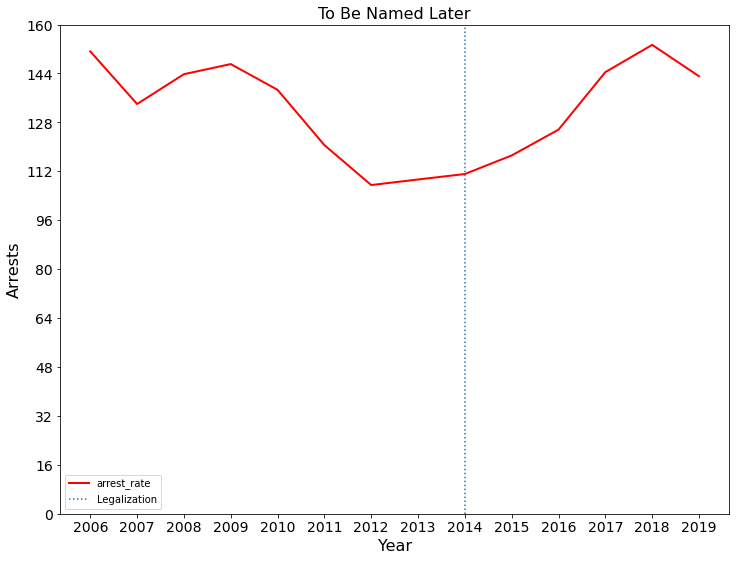

In [12]:
plt.figure(figsize=(12,9))
plt.xticks(range(2006,2020, 1), fontsize=14)
plt.yticks(np.linspace(0, 160, 11), fontsize=14)
plt.plot('data_year', 'arrest_rate', data=violent_crime, marker='', color='r', linewidth=2)
plt.ylim(0,160)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Arrests', fontsize=16)
plt.axvline(x=2014, label='Legalization', linestyle=':')
plt.title('To Be Named Later', fontsize=16)
plt.autoscale(enable=False, axis='y')
plt.legend()
plt.show()